Assignment 30 - Compress racoon grey scale image into 5 clusters.

# Import libraries
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

Load original image from scipy

In [2]:
import scipy.misc

In [3]:
face= scipy.misc.face()

In [4]:
import matplotlib.pyplot as plt

Show image

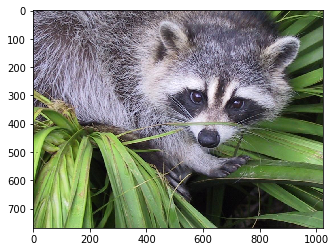

In [5]:
plt.gray()
plt.imshow(face)
plt.show()

In [6]:
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [7]:
# Shape of image and reshape
face.shape

(768, 1024, 3)

In [8]:
face_new = (face/255.0).reshape(-1,3)

In [9]:
face_new.shape

(786432, 3)

Load Kmeans cluster from Sklearn

In [10]:
from sklearn.cluster import KMeans

Compress original image into 5 clusters

In [11]:
k_colors = KMeans(n_clusters=5).fit(face_new)
y_pred = k_colors.predict(face_new)

In [12]:
k_colors.cluster_centers_.shape

(5, 3)

In [13]:
k_colors.labels_.shape

(786432,)

In [14]:
face_new=k_colors.cluster_centers_[k_colors.labels_]

In [15]:
face_new.shape

(786432, 3)

In [17]:
# Reshape to original image shape
face_new=np.reshape(face_new,(face.shape))

In [18]:
face_new.shape

(768, 1024, 3)

Display both original and compressed images

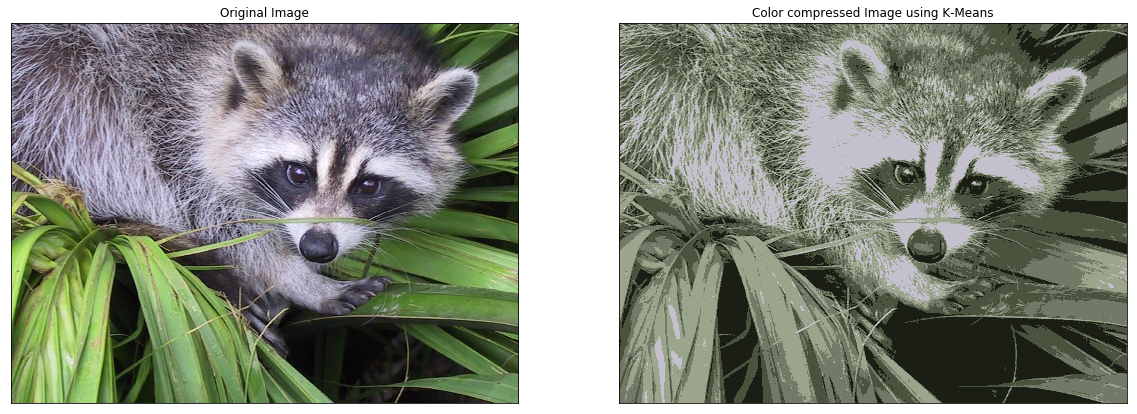

In [31]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[],title='Original Image')
ax.imshow(face)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[],title='Color compressed Image using K-Means')
ax.imshow(face_new)
plt.show()